In [53]:
import os
os.chdir(r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week12\homework')
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week12\\homework'

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [55]:
orig_df = pd.read_csv('meat_diary_oils_seafood_fruits_nuts.csv')
fig_folder = ''
orig_df.head(10)

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin A RAE,Vitamin B1,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Zinc,Manganese
0,Acerola,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,...,0.000038,0.00002,0.0,0.00006,0.00040,0.00031,0.00001,1.6780,0.00010,NaN
1,Apple,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.000003,0.00002,0.0,0.00003,0.00009,0.00006,0.00004,0.0046,0.00004,0.00004
2,Apricot,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.000096,0.00003,0.0,0.00004,0.00060,0.00024,0.00005,0.0100,0.00020,0.00008
3,Dried fruit,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.000180,0.00002,0.0,0.00007,0.00260,0.00052,0.00014,0.0010,0.00039,0.00024
4,Avocado,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.000007,0.00007,0.0,0.00013,0.00170,0.00140,0.00026,0.0100,0.00064,0.00014
5,Banana,Fruits,0.005,89.0,23.0,0.0,0.00008,0.33,2.6,0.000020,...,0.000003,0.00003,0.0,0.00007,0.00067,0.00033,0.00037,0.0087,0.00015,0.00027
6,Blackberry,Fruits,0.029,43.0,9.6,0.0,0.00017,0.49,5.3,0.000025,...,0.000011,0.00002,0.0,0.00003,0.00065,0.00028,0.00003,0.0210,0.00053,0.00065
7,Blueberry,Fruits,0.006,57.0,14.0,0.0,0.00006,0.33,2.4,0.000006,...,0.000003,0.00004,0.0,0.00004,0.00042,0.00012,0.00005,0.0097,0.00016,0.00034
8,Boysenberries,Fruits,0.027,50.0,12.0,0.0,0.00008,0.26,5.3,0.000063,...,0.000003,0.00005,0.0,0.00004,0.00077,0.00025,0.00006,0.0031,0.00022,0.00055
9,Breadfruit,Fruits,0.017,103.0,27.0,0.0,0.00008,0.23,4.9,0.000014,...,0.000000,0.00011,0.0,0.00003,0.00090,0.00046,0.00010,0.0290,0.00012,0.00006


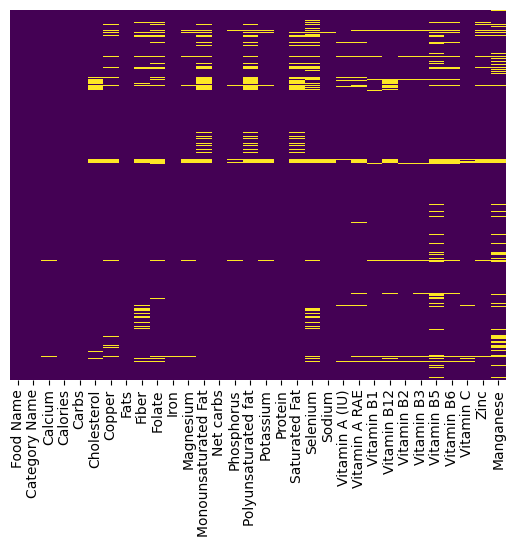

In [56]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [57]:
null_percent = orig_df.isnull().sum()/len(orig_df)*100
null_percent

Food Name               0.000000
Category Name           0.000000
Calcium                 0.486618
Calories                0.000000
Carbs                   0.000000
Cholesterol             4.622871
Copper                  4.866180
Fats                    0.000000
Fiber                   7.055961
Folate                  6.569343
Iron                    0.243309
Magnesium               2.676399
Monounsaturated Fat     9.489051
Net carbs               0.000000
Phosphorus              1.216545
Polyunsaturated fat     9.489051
Potassium               2.189781
Protein                 0.000000
Saturated Fat           8.759124
Selenium               10.948905
Sodium                  1.459854
Vitamin A (IU)          1.946472
Vitamin A RAE           4.136253
Vitamin B1              1.946472
Vitamin B12             4.866180
Vitamin B2              1.703163
Vitamin B3              1.946472
Vitamin B5             12.408759
Vitamin B6              4.866180
Vitamin C               1.946472
Zinc      

In [58]:
cleaned_df = orig_df.copy()

In [59]:
cleaned_df = cleaned_df.dropna()
cleaned_df.shape

(298, 32)

In [60]:
null_percent = cleaned_df.isnull().sum()/len(cleaned_df)*100
null_percent

Food Name              0.0
Category Name          0.0
Calcium                0.0
Calories               0.0
Carbs                  0.0
Cholesterol            0.0
Copper                 0.0
Fats                   0.0
Fiber                  0.0
Folate                 0.0
Iron                   0.0
Magnesium              0.0
Monounsaturated Fat    0.0
Net carbs              0.0
Phosphorus             0.0
Polyunsaturated fat    0.0
Potassium              0.0
Protein                0.0
Saturated Fat          0.0
Selenium               0.0
Sodium                 0.0
Vitamin A (IU)         0.0
Vitamin A RAE          0.0
Vitamin B1             0.0
Vitamin B12            0.0
Vitamin B2             0.0
Vitamin B3             0.0
Vitamin B5             0.0
Vitamin B6             0.0
Vitamin C              0.0
Zinc                   0.0
Manganese              0.0
dtype: float64

In [61]:
cleaned_df.dtypes

Food Name               object
Category Name           object
Calcium                float64
Calories               float64
Carbs                  float64
Cholesterol            float64
Copper                 float64
Fats                   float64
Fiber                  float64
Folate                 float64
Iron                   float64
Magnesium              float64
Monounsaturated Fat    float64
Net carbs              float64
Phosphorus             float64
Polyunsaturated fat    float64
Potassium              float64
Protein                float64
Saturated Fat          float64
Selenium               float64
Sodium                 float64
Vitamin A (IU)         float64
Vitamin A RAE          float64
Vitamin B1             float64
Vitamin B12            float64
Vitamin B2             float64
Vitamin B3             float64
Vitamin B5             float64
Vitamin B6             float64
Vitamin C              float64
Zinc                   float64
Manganese              float64
dtype: o

In [62]:
cleaned_df.columns

Index(['Food Name', 'Category Name', 'Calcium', 'Calories', 'Carbs',
       'Cholesterol', 'Copper', 'Fats', 'Fiber', 'Folate', 'Iron', 'Magnesium',
       'Monounsaturated Fat', 'Net carbs', 'Phosphorus', 'Polyunsaturated fat',
       'Potassium', 'Protein', 'Saturated Fat', 'Selenium', 'Sodium',
       'Vitamin A (IU)', 'Vitamin A RAE', 'Vitamin B1', 'Vitamin B12',
       'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C',
       'Zinc', 'Manganese'],
      dtype='object')

In [63]:
cleaned_df.describe()

,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,Iron,Magnesium,...,Vitamin A RAE,Vitamin B1,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Zinc,Manganese
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,2.980000e+02,298.000000,298.000000,298.00000,298.000000,298.000000,298.000000,298.000000
mean,0.096695,240.244966,7.583960,0.083275,0.000261,16.964933,1.075168,0.000023,0.001656,0.034279,...,0.000169,0.000132,2.604161e-06,0.000755,0.002875,0.00070,0.000222,0.005247,0.002011,0.000304
std,0.195170,194.588707,12.580835,0.141691,0.000928,22.467859,2.290366,0.000048,0.002349,0.049395,...,0.000799,0.000205,8.103143e-06,0.008856,0.003442,0.00083,0.000217,0.017550,0.004818,0.000926
min,0.000000,11.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.012000,109.000000,0.000000,0.000000,0.000040,1.200000,0.000000,0.000005,0.000313,0.012000,...,0.000001,0.000030,0.000000e+00,0.000060,0.000265,0.00025,0.000060,0.000000,0.000373,0.000020
50%,0.025000,188.000000,1.900000,0.066000,0.000080,8.050000,0.000000,0.000010,0.000855,0.022000,...,0.000015,0.000060,7.550000e-07,0.000160,0.001650,0.00048,0.000150,0.000000,0.001100,0.000040
75%,0.080750,310.500000,11.000000,0.092750,0.000160,25.750000,0.875000,0.000020,0.001900,0.033750,...,0.000064,0.000130,2.200000e-06,0.000260,0.004475,0.00087,0.000350,0.002525,0.002800,0.000130
max,1.109000,902.000000,79.000000,1.085000,0.014000,100.000000,13.000000,0.000588,0.018000,0.376000,...,0.009442,0.001400,9.900000e-05,0.153000,0.022000,0.00710,0.001700,0.228000,0.079000,0.008800


### Set Up Data

In [64]:
df = cleaned_df.copy()

In [65]:
# Create list of input attributes and output variable
df = cleaned_df.copy()
output_var = 'Category Name'
input_vars = df.columns.tolist()
input_vars.remove('Food Name')
input_vars.remove('Category Name')
# Create attribute input and output datasets
X = df[input_vars]
orig_y = df[output_var]
y = orig_y.copy()

In [66]:
orig_y.unique()

array(['Fruits', 'Seafood', 'Dairy', 'Meat', 'Nuts', 'Oils and Sauces'],
      dtype=object)

In [67]:
# Convert category_name to numbers for handling frequency more easily later
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(orig_y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [68]:
train_percent = 0.9

### For a specific groundtruth y, Create (1) Distribution of f_hat, and find (2) a Value of Mode(f_hat)

In [69]:
len(input_vars)

30

In [70]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy import stats as st
from sklearn.model_selection import train_test_split
test_percent = 0.2
main_X_train, X_test, main_y_train, y_test = train_test_split(X, y, test_size=test_percent)

from sklearn.preprocessing import StandardScaler
scaled_main_X_train = StandardScaler().fit_transform(main_X_train)
scaled_X_test = StandardScaler().fit_transform(X_test)

num_iterations = 1000       # can choose other  values
selected_params = [5, 15, 25]   # can choose other paramater values

train_size = int(len(main_X_train)*train_percent)
test_size = len(X_test)

test_f_hat = np.zeros((len(selected_params), num_iterations))

# select the first value in y_test to be ground truth (can select any value in y_test)
ground_truth_y = y_test.tolist()[0]

for p in range(len(selected_params)):
    num_params = selected_params[p]
    classifier = DecisionTreeClassifier()
    for i in range(num_iterations):
        rand_index = np.random.permutation(len(main_X_train))[:train_size]
        scaled_X_train, y_train = scaled_main_X_train[rand_index.tolist()], main_y_train[rand_index.tolist()]

        classifier.fit(scaled_X_train, y_train)
        test_param_y_predicted = classifier.predict(scaled_X_test)
        test_f_hat[p,i] = test_param_y_predicted[0]

print('Done')

Done


In [71]:
print(test_f_hat)

[[5. 2. 5. ... 5. 5. 5.]
 [0. 0. 5. ... 1. 5. 0.]
 [5. 5. 5. ... 5. 5. 5.]]


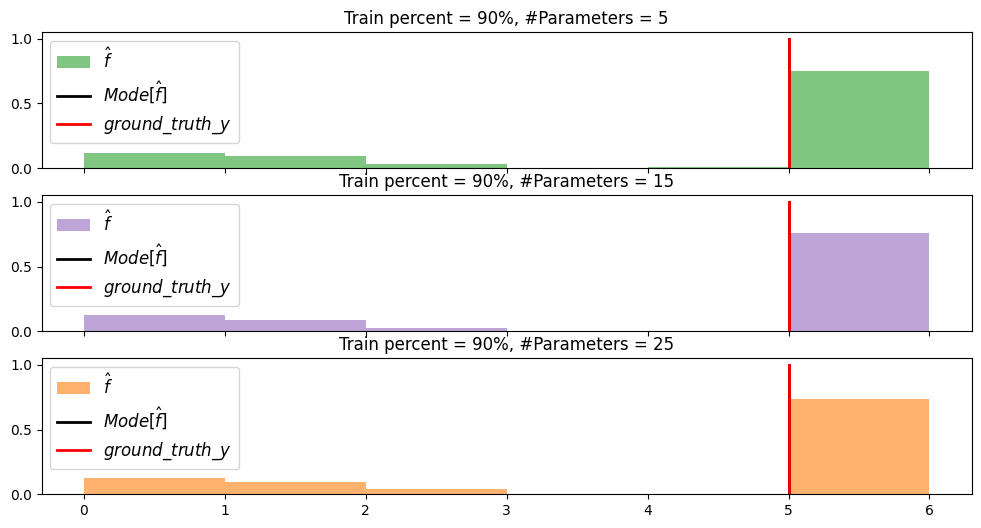

In [72]:
# Plot distribution of f_hat for 3 parameters, along with Mode_f_hat and ground_truth_y
max_heights = [1, 1, 1]   # can choose other  values

num_classes = 6     # adjust this value for your dataset
bins = np.arange(0, num_classes+1,1)

test_E_f_hat = []
for k in range(len(selected_params)):
    temp_mode = np.bincount(test_f_hat[k].astype(int)).argmax()
    test_E_f_hat.append(temp_mode)

colors = np.array(['tab:green', 'tab:purple', 'tab:orange'])
fig, axs = plt.subplots(len(selected_params), figsize=(12, 6), sharex=True)
for k in range(len(selected_params)):
    # plot distribution of f_hat
    axs[k].hist(test_f_hat[k], bins=bins, color=colors[k], density=True, alpha=0.6, label=r'$\hat{f}$')

    #plot Mode_f_hat
    axs[k].plot([test_E_f_hat[k], test_E_f_hat[k]], [0, max_heights[k]], c='k', linewidth=2.0, label=r'$Mode[\hat{f}]$')

    # plot ground_truth_y
    axs[k].plot([ground_truth_y, ground_truth_y], [0, max_heights[k]], 'r', linewidth=2.0, label=r'$ground\_truth\_y$')

    # set title and legend
    axs[k].title.set_text('Train percent = {0:.0f}%, #Parameters = {1}'.format(train_percent*100, selected_params[k]))
    axs[k].legend(fontsize=12)

plt.show()

### Bias-Variance Tradeoff

In [73]:
print(len(input_vars))

30


In [74]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
test_percent = 0.2
main_X_train, X_test, main_y_train, y_test = train_test_split(X, y, test_size=test_percent)

from sklearn.preprocessing import StandardScaler
scaled_main_X_train = StandardScaler().fit_transform(main_X_train)
scaled_X_test = StandardScaler().fit_transform(X_test)

interval = 1       # can choose other  values
start_param = 1    # can choose other  values
max_param = 15     # can choose other  values
param_list = np.arange(start_param, max_param+1, interval).tolist()
print(param_list)

num_iterations = 1000  # can choose other  values

train_size = int(len(main_X_train)*train_percent)
test_size = len(X_test)
print(train_size)
print(test_size)

train_sample_error = np.zeros((len(param_list), num_iterations))  # shape: Params x Iterations
test_f_hat = np.zeros((len(param_list), num_iterations, test_size))  # shape: Params x Iterations x Test_size

for i in range(num_iterations):
    # Shuffle and select training set with specific train_size
    rand_index = np.random.permutation(len(main_X_train))[:train_size]
    scaled_X_train, y_train = scaled_main_X_train[rand_index.tolist()], main_y_train[rand_index.tolist()]

    for p in range(len(param_list)):
        num_params = param_list[p]
        classifier = DecisionTreeClassifier()
        classifier.fit(scaled_X_train, y_train)

        # Make predictions for training and test sets
        train_param_y_predicted = classifier.predict(scaled_X_train)
        test_param_y_predicted = classifier.predict(scaled_X_test)

        # Compute Average Error for all samples in training set
        # Error in classification = Incorrect classification
        # Note: train_sample_error dimesion = shape: Params x Iterations
        train_sample_error[p, i] = sum([1 for i in range(train_size) if y_train.tolist()[i] != train_param_y_predicted[i]]) / train_size

        # Collect predictions of test sets to compute error for test sets later
        test_f_hat[p, i, :] = test_param_y_predicted  # shape: Params x Iterations x Test_size

print('Done')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
214
60
Done


In [75]:
#variance of the 0-1 loss is defined as the probability that the predicted label does not match the main prediction E[F_hat]
# E_f_hat = mode of f_hat

# train_sample_error dimension = # shape: Params x Iterations
# Get average MSE for all iterations
avg_train_error = np.mean(train_sample_error, 1)  # shape: Params
avg_train_error

test_sample_error = np.zeros((len(param_list), test_size))
test_E_f_hat = []
test_sample_bias = np.zeros(len(param_list))
test_sample_var_f_hat = np.zeros((len(param_list), test_size))
for p in range(len(param_list)):
    temp_E_f_hat = []
    test_sample_bias_count = 0

    for t in range(test_size):
        test_predictions = test_f_hat[p,:,t]  # shape: num_iterations
        test_predictions = test_predictions.astype(int)

        test_sample_error[p,t] = sum([1 for prediction in test_predictions if prediction != y_test[t]]) / num_iterations

        # find mode among all iterations, and assign it to be E[f_hat]
        E_f_hat = np.bincount(test_predictions).argmax()
        temp_E_f_hat.append(E_f_hat)

        test_sample_var_f_hat[p,t] = sum([1 for prediction in test_predictions if prediction != E_f_hat]) / num_iterations

    test_sample_bias[p] = sum([1 for i in range(len(y_test)) if temp_E_f_hat[i] != y_test[i]])  / test_size

# test_sample_error dimension = len(param_list) x test_size
avg_test_error = np.mean(test_sample_error, 1)  # shape: Params

# test_sample_var_f_hat dimension = len(param_list) x test_size
avg_test_var_f_hat = np.mean(test_sample_var_f_hat, 1)  # shape: Params

print(avg_train_error)
print(avg_test_error)
print(test_sample_bias)
print(avg_test_var_f_hat)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.46906667 0.4687     0.46888333 0.4676     0.46803333 0.47075
 0.46968333 0.46638333 0.46738333 0.46836667 0.46936667 0.4695
 0.46928333 0.47093333 0.47216667]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[0.1988     0.19873333 0.1996     0.20088333 0.20068333 0.19943333
 0.19475    0.20761667 0.19946667 0.20208333 0.20208333 0.20056667
 0.20201667 0.20001667 0.19378333]


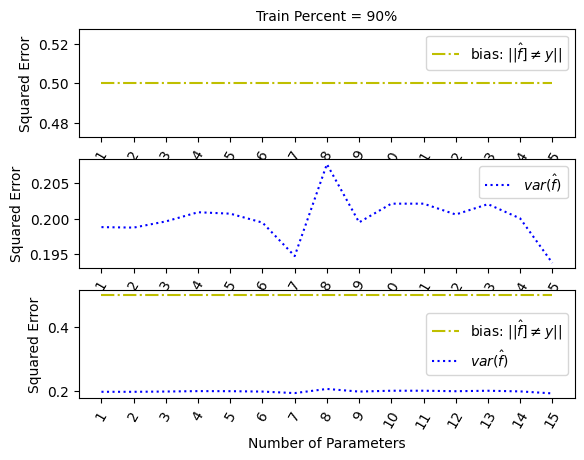

In [76]:
# Plot bias-variance
fig, ax = plt.subplots(3,1)
ax[0].plot(param_list, test_sample_bias, 'y-.', label=r'bias: $||\hat{f}] \neq y||$')
ax[0].set_xticks(param_list)
ax[0].set_xticklabels(param_list, rotation=60)
ax[0].set_xlabel('Number of Parameters', size=10)
ax[0].set_ylabel('Squared Error', size=10)
ax[0].legend(loc='upper right', fontsize=10)
ax[0].set_title('Train Percent = '+'{0:.0f}'.format(train_percent*100)+'%', fontsize=10)

ax[1].plot(param_list, avg_test_var_f_hat, 'b:', label=r'$var(\hat{f})$')
ax[1].set_xticks(param_list)
ax[1].set_xticklabels(param_list, rotation=60)
ax[1].set_xlabel('Number of Parameters', size=10)
ax[1].set_ylabel('Squared Error', size=10)
ax[1].legend(loc='upper right', fontsize=10)

ax[2].plot(param_list, test_sample_bias, 'y-.', label=r'bias: $||\hat{f}] \neq y||$')
ax[2].plot(param_list, avg_test_var_f_hat, 'b:', label=r'$var(\hat{f})$')
ax[2].set_xticks(param_list)
ax[2].set_xticklabels(param_list, rotation=60)
ax[2].set_xlabel('Number of Parameters', size=10)
ax[2].set_ylabel('Squared Error', size=10)
ax[2].legend(loc='right',fontsize=10)

plt.show()

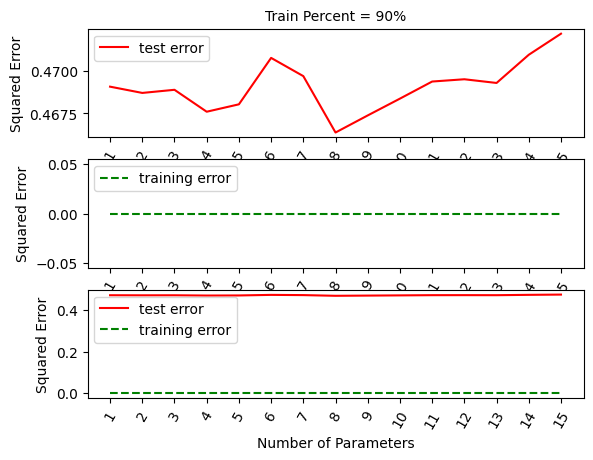

In [77]:
# Plot training and testing errors
fig, ax = plt.subplots(3,1)
ax[0].plot(param_list, avg_test_error, 'r', label='test error')
ax[0].set_xticks(param_list)
ax[0].set_xticklabels(param_list, rotation=60)
ax[0].set_xlabel('Number of Parameters', size=10)
ax[0].set_ylabel('Squared Error', size=10)
ax[0].legend(loc='upper left', fontsize=10)
ax[0].set_title('Train Percent = '+'{0:.0f}'.format(train_percent*100)+'%', fontsize=10)

ax[1].plot(param_list, avg_train_error, 'g--', label='training error')
ax[1].set_xticks(param_list)
ax[1].set_xticklabels(param_list, rotation=60)
ax[1].set_xlabel('Number of Parameters', size=10)
ax[1].set_ylabel('Squared Error', size=10)
ax[1].legend(loc='upper left', fontsize=10)

ax[2].plot(param_list, avg_test_error, 'r', label='test error')
ax[2].plot(param_list, avg_train_error, 'g--', label='training error')
ax[2].set_xticks(param_list)
ax[2].set_xticklabels(param_list, rotation=60)
ax[2].set_xlabel('Number of Parameters', size=10)
ax[2].set_ylabel('Squared Error', size=10)
ax[2].legend(loc='upper left', fontsize=10)

plt.show()

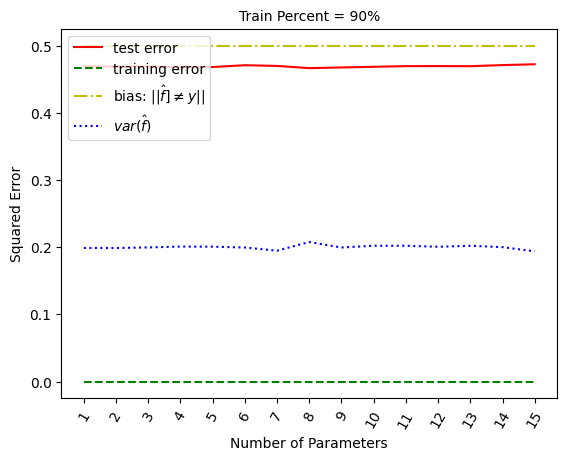

In [78]:
# Plot everything
fig, ax = plt.subplots()
ax.plot(param_list, avg_test_error, 'r', label='test error')
ax.plot(param_list, avg_train_error, 'g--', label='training error')

ax.plot(param_list, test_sample_bias, 'y-.', label=r'bias: $||\hat{f}] \neq y||$')
ax.plot(param_list, avg_test_var_f_hat, 'b:', label=r'$var(\hat{f})$')

ax.set_xticks(param_list)
ax.set_xticklabels(param_list, rotation=60)
ax.set_xlabel('Number of Parameters', size=10)
ax.set_ylabel('Squared Error', size=10)
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Train Percent = '+'{0:.0f}'.format(train_percent*100)+'%', fontsize=10)

fig.savefig(fig_folder+'bv_01loss_trainsize_'+str(train_size)+'.jpg')
plt.show()